In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Univariate Linear Regression

In [101]:
fun = lambda x: x + np.random.uniform(x*.9, x*1.1)
#fun = lambda x: np.sin(x) + 0.01 * x * x

X = np.linspace(1, 10, 100)
y = fun(X)

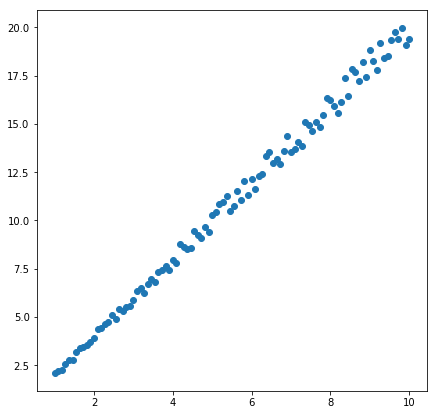

In [102]:
plt.figure(figsize=(7,7))

plt.scatter(X,y)

plt.show()

In [103]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [104]:
preds = clf.predict(X.reshape(-1, 1))

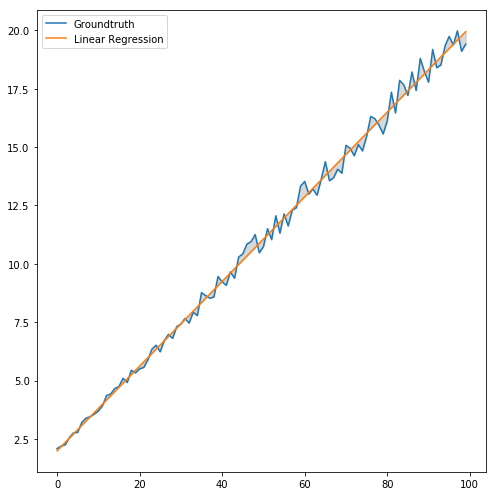

In [105]:
plt.figure(figsize=(7,7))

plt.plot(y, label='Groundtruth')
plt.plot(preds, label='Linear Regression')

plt.fill_between(x=range(y.shape[0]), y1=y, y2=preds[:,0], 
                 color='grey', alpha=0.3)

plt.tight_layout()
plt.legend()
plt.show()

In [106]:
residuals = np.zeros(preds.shape[0])

for i in range(preds.shape[0]):
    #residuals[i] = 100 * (y_test[i] - preds[i]) / y_test[i]
    residuals[i] = y[i] - preds[i]

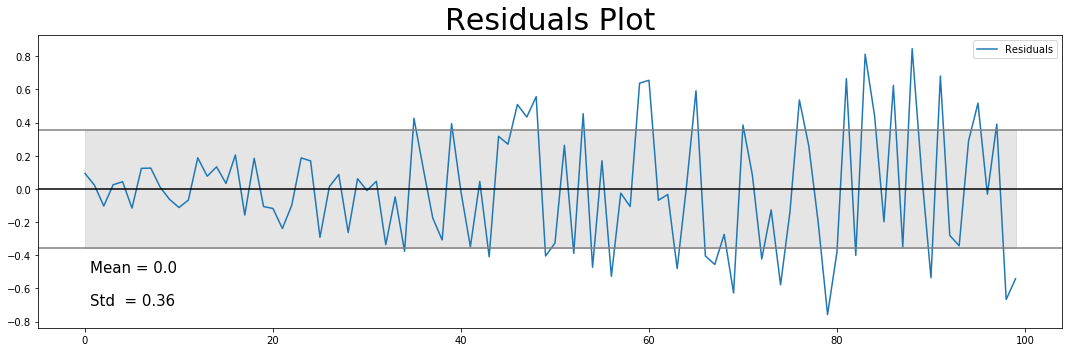

In [107]:
plt.figure(figsize=(15,5))

plt.plot(residuals, label='Residuals')
plt.axhline(y=np.mean(residuals), color='k')
plt.axhline(y=np.mean(residuals)-np.std(residuals), color='grey')
plt.axhline(y=np.mean(residuals)+np.std(residuals), color='grey')

plt.fill_between(x=range(y.shape[0]), y1=np.mean(residuals)+np.std(residuals), 
                 y2=np.mean(residuals)-np.std(residuals), 
                 alpha=0.2, color='grey')

plt.text(0.5, -0.5, 'Mean = {}'.format(np.mean(residuals).round(2)), fontsize=15)
plt.text(0.5, -0.7, 'Std  = {}'.format(np.std(residuals).round(2)), fontsize=15)
     
plt.title('Residuals Plot', fontsize=30)
plt.tight_layout()
plt.legend()
plt.show()

In [108]:
clf.score(X.reshape(-1, 1), y.reshape(-1, 1))

0.9953637308219601

# Multivariate Linear Regression

In [2]:
airfoil = pd.read_csv('../../data/airfoil/airfoil_self_noise.dat', sep='\t')

In [3]:
airfoil.head()

,Frequency (Hz),Angle of Attack (deg),Chord Length (m),Free-Stream Velocity (m/s),Suction Side Displacement Thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
airfoil.shape

(1503, 6)

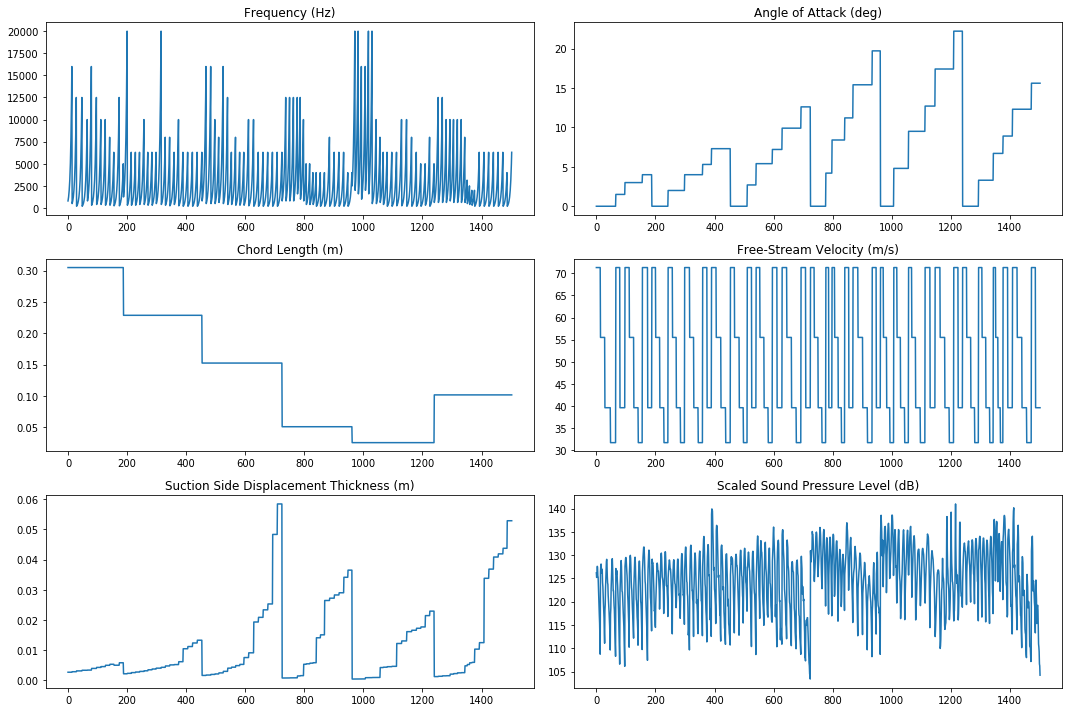

In [5]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

ax1.plot(airfoil['Frequency (Hz)'])
ax1.set_title('Frequency (Hz)')

ax2.plot(airfoil['Angle of Attack (deg)'])
ax2.set_title('Angle of Attack (deg)')

ax3.plot(airfoil['Chord Length (m)'])
ax3.set_title('Chord Length (m)')

ax4.plot(airfoil['Free-Stream Velocity (m/s)'])
ax4.set_title('Free-Stream Velocity (m/s)')

ax5.plot(airfoil['Suction Side Displacement Thickness (m)'])
ax5.set_title('Suction Side Displacement Thickness (m)')

ax6.plot(airfoil['Scaled Sound Pressure Level (dB)'])
ax6.set_title('Scaled Sound Pressure Level (dB)')

plt.tight_layout()
plt.show()

In [6]:
y = airfoil['Scaled Sound Pressure Level (dB)']
X = airfoil.drop('Scaled Sound Pressure Level (dB)', axis=1)

In [7]:
X = X.values
y = y.values

In [8]:
X, y = shuffle(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [10]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [11]:
preds = clf.predict(X_test)

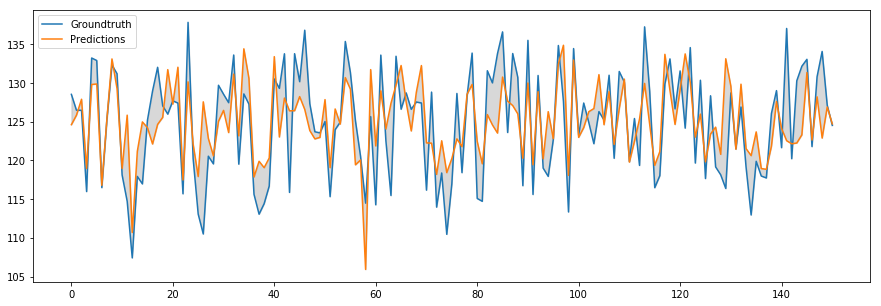

In [12]:
start = 0
end   = y_test.shape[0]

plt.figure(figsize=(15,5))

plt.plot(y_test[start:end], label='Groundtruth')
plt.plot(preds[start:end], label='Predictions')

plt.fill_between(x=range(y_test[start:end].shape[0]), y1=y_test[start:end], y2=preds[start:end], 
                 color='grey', alpha=0.3)

plt.legend()
plt.show()

In [19]:
residuals = np.zeros(preds.shape[0])

for i in range(preds.shape[0]):
    #residuals[i] = 100 * (y_test[i] - preds[i]) / y_test[i]
    residuals[i] = y_test[i] - preds[i]

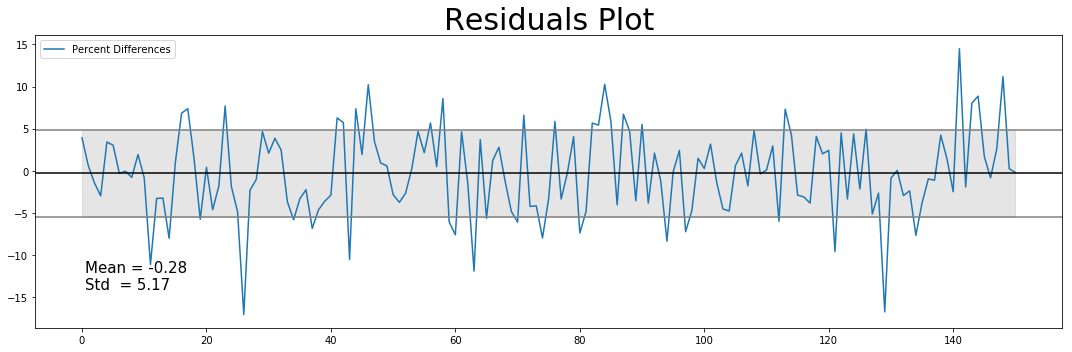

In [28]:
plt.figure(figsize=(15,5))

plt.plot(residuals, label='Residuals')
plt.axhline(y=np.mean(residuals), color='k')
plt.axhline(y=np.mean(residuals)-np.std(residuals), color='grey')
plt.axhline(y=np.mean(residuals)+np.std(residuals), color='grey')

plt.fill_between(x=range(y_test.shape[0]), y1=np.mean(residuals)+np.std(residuals), 
                 y2=np.mean(residuals)-np.std(residuals), 
                 alpha=0.2, color='grey')

plt.text(0.5, -12, 'Mean = {}'.format(np.mean(residuals).round(2)), fontsize=15)
plt.text(0.5, -14, 'Std  = {}'.format(np.std(residuals).round(2)), fontsize=15)
     
plt.title('Residuals Plot', fontsize=30)
plt.tight_layout()
plt.legend()
plt.show()

In [21]:
print('mean of preds = ', np.mean(preds))
print('std  of preds = ', np.std(preds))
print('\n')
print('mean of truth = ', np.mean(y_test))
print('std  of truth = ', np.std(y_test))
print('\n')
print('mean of resid = ', np.mean(residuals))
print('std  of resid = ', np.std(residuals))

mean of preds =  125.0065839986767
std  of preds =  4.744772327272334


mean of truth =  124.72537086092714
std  of truth =  6.961526385126078


mean of resid =  -0.2812131377495414
std  of resid =  5.17331571393137


In [22]:
clf.score(X_test, y_test)

0.4461267440850874